### **🎩🐰 Magic Time! Let's get our hands on some digital wizardry tools! ✨**

First, we're going to ask our trusty assistant, pip, to fetch us some spellbooks... erm, I mean modules.

In [3]:
%load_ext watermark
%watermark -a "Utsha Saha" -u -d -p numpy,pandas,matplotlib

Author: Utsha Saha

Last updated: 2023-10-02

numpy     : 1.23.5
pandas    : 1.5.3
matplotlib: 3.7.1



In [2]:
!pip install requests wordcloud pandas nltk beautifulsoup4 watermark
from IPython.display import clear_output
clear_output()  # Ta-da! Like we never made a mess!

### **The Mighty Toolbox 🧰**

In [ ]:
# 🕰 Timekeepers & Recorders: For when we want to reminisce about the past... or measure performance.
import time
import re
import pickle
from collections import Counter

# 📚 Data Librarians: They love to sort, filter, and generally make sense of vast amounts of information.
import pandas as pd
import nltk
from nltk.corpus import stopwords

# 🕸 Web Wranglers: Because even data scientists need to get tangled in the web sometimes.
import requests
from bs4 import BeautifulSoup
from requests.exceptions import RequestException

# 🎨 Visual Maestros: For when bar charts and scatter plots need to be as flamboyant as a peacock!
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# To round things off, we're summoning some essential knowledge (like, literally downloading it). Also, setting the ambiance with a stylish touch! 🕺
nltk.download('stopwords')
plt.style.use("bmh")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **🕵️‍♂️ Mission Impossible: The Job Heist! 🎥**

You there! 🤓 Are you ready for a digital heist? Today, we're going to swoop into the Handshake website like a ninja in the night, grab all the job listings, and make our smooth getaway. 🏃‍♂️💨

### **Step 1**

Get your own sneaky disguise! (aka cookies 🍪). Make sure not to munch on them; we need them to bypass those security lasers. ⚡

In [ ]:
cookies = {
    ##############INSERT YOUR COOKIES!  🍪
}

### **Step 2**

Flash that ID! 🎫 Wear this fancy header so they don't know you're up to mischief.

In [ ]:
headers = {
    'authority': 'app.joinhandshake.com',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://app.joinhandshake.com/stu/postings?page=2&per_page=25&sort_direction=desc&sort_column=default',
    'sec-ch-ua': '"Not/A)Brand";v="99", "Google Chrome";v="115", "Chromium";v="115"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
    'x-csrf-token': '5UWQ1vv0cFdEF+eRwMNVtLdgwtX3yAOWLoXHcEPSy6te7wR+9ioH28mTUnUKsshOhB8Q2psZhUlcaHYQmeHw7g==',
    'x-requested-with': 'XMLHttpRequest',
}

### **Step 3**

Have a clear mission. (Basically, tell 'em what you're there for).

In [ ]:
params = {
    'category': 'Posting',
    'ajax': 'true',
    'including_all_facets_in_searches': 'true',
    'page': '1',
    'per_page': '100',
    'sort_direction': 'desc',
    'sort_column': 'created_at',
    '_': '1690602253870',
}

### **🚀 The Grand Scheme 🚀**
Enter, snag jobs, dance out! 🕺💼

In [ ]:
def get_jobs(params, cookies, headers, all_jobs_overview=[]):
    response = requests.get('https://app.joinhandshake.com/stu/postings', params=params, cookies=cookies, headers=headers)
    data = response.json()
    all_jobs_overview += data['results']

    if data['current_page'] < data['total_pages']:
        params['page'] = str(int(params['page']) + 1)
        print(f"page: {params['page']}")
        time.sleep(0.01)
        return get_jobs(params, cookies, headers, all_jobs_overview)

    return all_jobs_overview

all_jobs_overview = get_jobs(params, cookies, headers)

### **🔍 Mission Impossible 2: Infiltrating the Job Vault!** 🎥

Brace yourselves, partner in crime! 😎 If you thought nabbing the job listings was exhilarating, wait until we sneak into the vault and snag the full details of each job. We're going deeper!

**Pro Tip:** Keep those cookies 🍪 and headers 🎩 close; we’ll need them to disguise ourselves as we dig deeper.

In [ ]:
# 1️⃣ Setting up our tools:
def get_job_data(job_id, cookies=None, headers=None):
    """Get data for a specific job."""
    max_retries = 5

    for retries in range(max_retries):
        try:
            time.sleep(0.01)  # Sleep for a short duration before each request
            response = requests.get(
                f'https://app.joinhandshake.com/stu/jobs/{job_id}/search_preview',
                cookies=cookies,
                headers=headers
            )
            response.raise_for_status()
            data = response.json()
            return data['job']
        except (RequestException, KeyError):
            # If an exception occurred, wait with exponential back-off
            time.sleep(min(2 ** retries, 60))  # Cap the sleep time to 60 seconds
    return None

# 2️⃣ The Grand Heist:
all_jobs = []

for index, job_details in enumerate(all_jobs_overview):
    job_id = job_details['job_id']
    print(f'{index}, {job_id}')
    job_data = get_job_data(job_id, cookies, headers)
    if job_data:
        all_jobs.append(job_data)

In [ ]:
print(f"🎉 Ta-da! We've successfully infiltrated and extracted data for {len(all_jobs)} jobs! 🕺")

🎉 Ta-da! We've successfully infiltrated and extracted data for 7327 jobs! 🕺


### **🕺 Prep Work**

First things first! We're kicking out the party poopers from our text. Yep, those words that just *love* to crash every textual gathering.

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text: str):
    word_list = re.findall(r'\b[A-Za-z]+\b', text)
    # Let's kick out those boring words that show up too often!
    non_boring_words = [word for word in word_list if word.lower() not in stop_words]
    return non_boring_words

### **📜 The Mixing Bowl**

Let's mix all our job info together. Imagine it's like creating the ultimate textual smoothie, full of flavors (and hopefully not too chunky)

In [ ]:
def concatenate_job_info(_all_jobs:list):
    job_titles_for_the_win = []
    job_descriptions_as_seen_on_tv = []

    for job in _all_jobs:
        job_titles_for_the_win.append(job['title'].lower())
        soup = BeautifulSoup(job['description'], 'html.parser')
        # Soup's ready! Let's get all that yummy text out
        yummy_text = soup.get_text(separator="\n").lower()
        job_descriptions_as_seen_on_tv.append(yummy_text)

    job_titles_for_the_win = ' '.join(job_titles_for_the_win)
    job_descriptions_as_seen_on_tv = ' '.join(job_descriptions_as_seen_on_tv)

    job_titles_for_the_win = remove_stopwords(job_titles_for_the_win)
    job_descriptions_as_seen_on_tv = remove_stopwords(job_descriptions_as_seen_on_tv)

    return Counter(job_titles_for_the_win), Counter(job_descriptions_as_seen_on_tv)

### **☁️ Wordy Weather Report**
Get your umbrellas ready! We're creating a cloud, but instead of rain, it showers words. Sounds fun, huh?

In [ ]:
def create_wordcloud_from_jobs(text_list:list):
    wordcloud = WordCloud(width=2000, height=2000, margin=0).generate_from_frequencies(text_list)

    plt.figure(facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

### **🥧 Sweet Pie of Knowledge**

Forget apple or cherry pies. Here we're serving a fresh, hot pie chart. (But don't eat it; it's very... data-rich!)


In [ ]:
def visualize_counter_with_pie_chart(counter, put_label=True):
    labels, sizes = zip(*counter.items())
    colors = plt.get_cmap('tab20c').colors
    if put_label:
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    else:
        plt.pie(sizes, colors=colors, shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

### **📊 Gossip Column of Words**

Curious which words are being total drama queens? Here's a tabloid-y chart showcasing the stars of our text!

In [ ]:
def plot_bar_word_counts(text_list:list, top_n=20):
    the_most_gossiped_words = text_list.most_common(top_n)
    labels, values = zip(*the_most_gossiped_words)

    plt.figure(figsize=(6,6))
    plt.bar(labels, values)
    plt.xlabel('Words Strutting Their Stuff')
    plt.ylabel('How Many Times They Took The Spotlight')
    plt.title(f'Top {top_n} Attention-Grabbing Divas')
    plt.xticks(rotation='vertical')
    plt.show()

### **🚂 All aboard the Job Express!**

Choo-choo! We're putting together all the job titles and descriptions into two big, fancy lists. Hope they get along with each other in there!

In [ ]:
all_jobs_name, all_jobs_description = concatenate_job_info(all_jobs)

### **🔍 The Spotlight's On!**

Surprise, surprise! "Technician", "Engineer", "Manager", "Sales", and "Teacher" are the Beyoncés of our job title world. Together, they're stealing about half of the word cloud's limelight!

Alongside our job title celebrities, there's a budding star making waves: "Intern"! Must be that time of year when fresh faces are on the lookout to jump-start their careers. Let's rerun the performance to see this underdog in action during its prime season!


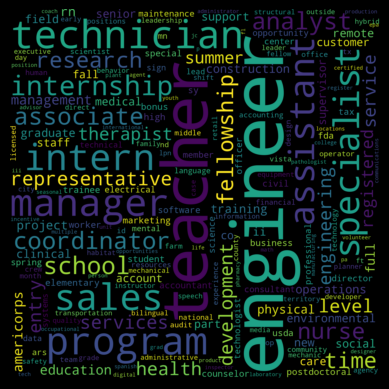

In [ ]:
create_wordcloud_from_jobs(all_jobs_name)

### **🎭 The Predictable Playbill of Job Descriptions**:

Our grand word cloud performance reveals... drumroll... the words every job seeker has seen ad nauseam! Behold, the all-stars: "Work", "Experience", and "Required". Supported by their trusty ensemble: "Must", "May", "Provide", and "Including". But let's be real – while they might be headlining, they're not giving us the behind-the-scenes scoop we were hoping for. Let's see them anyway, for old times' sake!

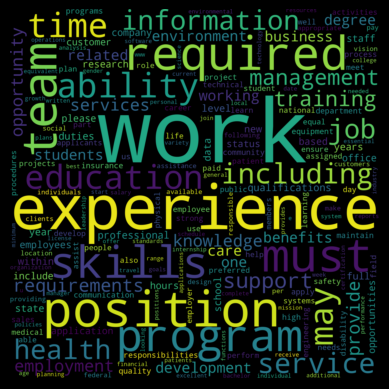

In [ ]:
create_wordcloud_from_jobs(all_jobs_description)

### **📊 The Job Title Popularity Contest**
Roll out the red carpet! Let's see which job titles are getting all the love and attention. Which ones will stand tall, and which ones will just be... well, the short bars on our chart? Time for a dramatic reveal!

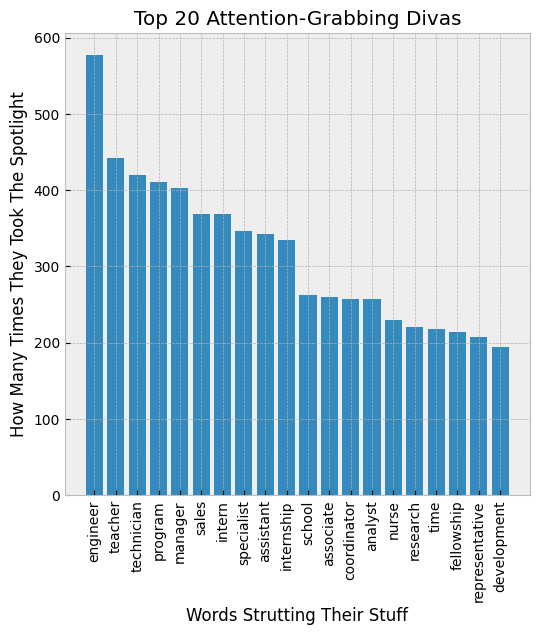

In [ ]:
plot_bar_word_counts(all_jobs_name)

### **🪑💻 Quest for the Ultimate Chair-Warming Jobs & Internships**

Let's go on a scavenger hunt for jobs that let you bond with your chair and computer all day! We've got our net (a.k.a. our slightly-overloaded regex) ready to catch anything that hints at programming, databases, and other nerdy stuff. Will we trap that elusive 99.9% of techie roles? Let's dive in!

In [ ]:
def concatenate_job_info_cs(_all_jobs:list):
    regex = re.compile(r'\b(python|javascript|java|c\b|c\#\b|c\+\+\b|php|swift|typescript|ruby|sql\b|rust|scala|mongodb|cockroachdb|html|css)\b')
    all_jobs_cs = []
    all_jobs_name = []
    all_jobs_description = []

    for items in _all_jobs:
        soup = BeautifulSoup(items['description'], 'html.parser')
        text = soup.get_text(separator="\n").lower()
        if regex.search(text):
            all_jobs_name.append(items['title'].lower())
            all_jobs_description.append(text)
            all_jobs_cs.append(items)

    all_jobs_name = ' '.join(all_jobs_name)
    all_jobs_description = ' '.join(all_jobs_description)

    all_jobs_name = remove_stopwords(all_jobs_name)
    all_jobs_description = remove_stopwords(all_jobs_description)

    return all_jobs_cs, Counter(all_jobs_name), Counter(all_jobs_description)


all_jobs_cs, all_jobs_name_cs, all_jobs_description_cs = concatenate_job_info_cs(all_jobs)

### **🔢 The Great Techie Tally**

Hold onto your keyboard! Let's see how many gigs we've fished out that revolve around the glamorous life of "sitting and coding". Time to unveil the magic number!

In [ ]:
len(all_jobs_cs)

822

### **🎩 Titles in the Techie Kingdom**

In the vast realm of tech, we've got our noble "Engineers" building the foundations, "Developers" crafting spells, and "Researchers" uncovering ancient algorithms. Meanwhile, the bright-eyed "Interns" learn the arcane arts, hoping to join the esteemed ranks. And oh, the "Fellowship" is not a journey to Mordor, but a special tribe mastering software's deepest secrets.

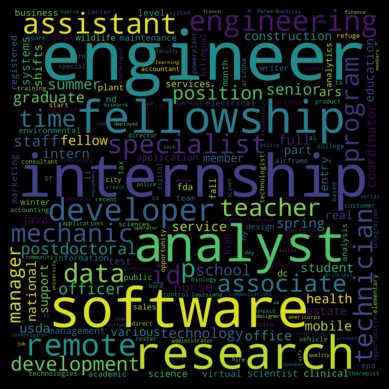

In [ ]:
create_wordcloud_from_jobs(all_jobs_name_cs)

### 🛠 **What’s Cooking in the Job Descriptions?**

Surprise, surprise! The life of a techie isn't just drowning in coffee and churning out code. Dive deeper, and you'll find tech gigs raving about previous "work" stints and the mysterious spell called "experience". They're also on a hunt for wizards with the right "skills". But here's the plot twist: they also want you to play well with others! Yes, even in a realm of binary, being a "team" player is golden.

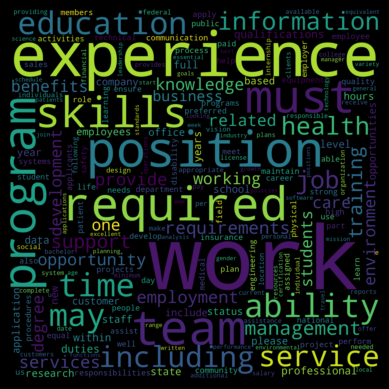

In [ ]:
create_wordcloud_from_jobs(all_jobs_description)

### 🔍 **The Job Title Rundown**

Welcome to the tech job Oscars! Taking center stage, we have the multitasking "Engineer" with a whopping 114 mentions. Not far behind, the eager "Internship" makes its mark, followed by the brainy "Software" role. From "Analyst" to "Research" to the virtual "Remote" roles, we've got quite the cast of characters. And, oh, don’t miss the surprise entries like "Mechanic" and "Teacher" sneaking into our tech arena. Let's roll out the red carpet and see how they all stack up!

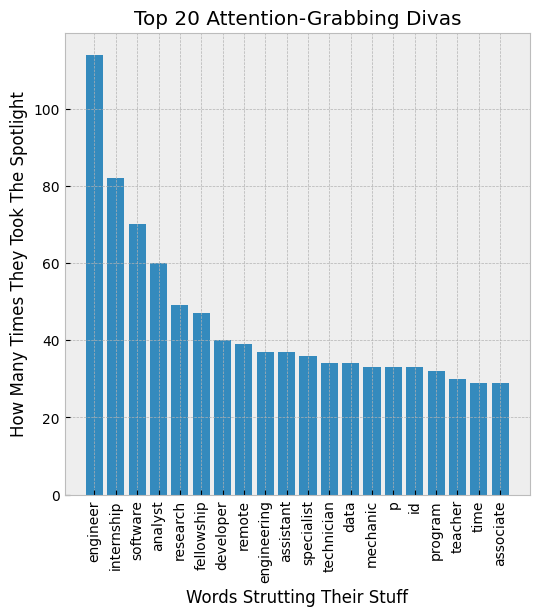

In [ ]:
plot_bar_word_counts(all_jobs_name_cs)

### 🌆 **Employer Central - Who's Hiring the Tech Talent?**

The bustling city of Tech-Topia has its skyscrapers, and then it has its charming cottages. Dominating the skyline is the "Oak Ridge Institute for Science and Education", housing 52 tech aficionados. "Textron" is not far behind, followed closely by "American Conservation Experience" and the ever-so-official "Internal Revenue Service (IRS)". But as you stroll through the alleys, you'll discover over 300 unique establishments, each with their own flavor, waiting to welcome tech talent. Let's explore the top employers and give a nod to those cozy corners of Tech-Topia.


In [ ]:
counter_output = dict(sorted(Counter([i['employer']['name'] for i in all_jobs_cs]).items(), key=lambda x: x[1], reverse=True))

df = pd.DataFrame(list(counter_output.items()), columns=['Employer', 'Count'])
with pd.option_context('display.max_colwidth', None):
    display(df)

,Employer,Count
0,Oak Ridge Institute for Science and Education,52
1,Textron,33
2,American Conservation Experience,16
3,Internal Revenue Service (IRS),16
4,Oneida Nation,15
...,...,...
301,Paramount Data Management Inc.,1
302,Supreme Court of the United States Police,1
303,UNC Cancer Rehabilitation Institute,1
304,Ellingson Companies,1


### 📊 **Decoding the Job Type Spectrum**

Hold on to your tech hats! Here's the breakdown:

- 🥇 **Dominating the Scene**: The classic "Job" takes the lion's share, making up a whopping 593 of the roles. That's over 70% of the total! Talk about being the main course on our tech menu.
  
- 🚀 **Stepping Stones**: "Internships" come in with a strong 146 positions. That's approximately 17% of the roles. A substantial portion, perfect for those looking to kickstart their tech journey.
  
- 🌟 **Special Opportunities**: "Fellowships" are the third most common, offering 63 unique roles. They account for about 7.5% of the roles, highlighting the value and exclusivity they bring.
  
- 🎓 **Campus Life**: "On-Campus Student Employment" comes in with a dozen (12) roles. It’s niche, but essential for students aiming to gain experience while studying.
  
- 🤝 **Unique Experiences**: The remaining roles - "Cooperative Education", "Experiential Learning", and "Volunteer" - are few but invaluable. They represent the road less traveled, offering unique experiences for those willing to tread it.

Let's get a visual snapshot of our analysis!


In [ ]:
counter_output = Counter([i['job_type']['name'] for i in all_jobs_cs])
df = pd.DataFrame(list(counter_output.items()), columns=['Job Type', 'Count'])
with pd.option_context('display.max_colwidth', None):
  display(df)

,Job Type,Count
0,Job,593
1,Internship,146
2,Fellowship,63
3,Cooperative Education,5
4,On Campus Student Employment,12
5,Experiential Learning,1
6,Volunteer,2


### 💰 **Show Me The Money (Or Maybe Not)**

Let's dive into the currency of the tech world: compensation. While it's not all about the money, it sure plays a part!

- 🎉 **Laughing to the Bank**: A massive 93.9% of our tech roles are paid positions. The tech realm does believe in rewarding talent!

- 🌱 **Investing in the Future**: The remaining 6.1% are unpaid. While it might raise some eyebrows, these are likely to be internships or roles that offer invaluable experience, networking, or other non-monetary perks. Remember, sometimes the best investments in ourselves don't come with a paycheck!

But enough chit-chat, let's feast our eyes on a colorful pie chart that breaks down the numbers!

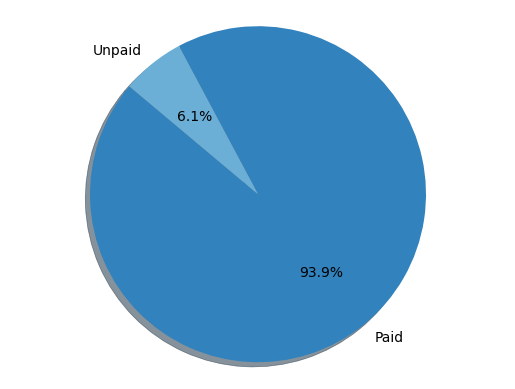

In [ ]:
counter_output = Counter([i['salary_type']['name'] for i in all_jobs_cs])
visualize_counter_with_pie_chart(counter_output)

### 🌎 **Navigating the Work Authorization Maze**

For international students looking to work in the tech domain, work authorization can be a tricky hurdle. Let's break down the opportunities based on work authorization requirements:

- 🦅 **Home Turf Advantage**: The majority, with 534 roles (roughly 63%), require US work authorization. It's clear that a significant portion of the tech world caters to local candidates.

- 🌉 **Bridging the Gap**: 101 roles (about 12%) require US work authorization but have employers willing to sponsor candidates. A door of opportunity for international talent!

- 🎓 **Student-Friendly Offers**: A substantial 75 roles (approximately 9%) are tailored for students with OPT/CPT. These are often prime opportunities for international students to gain industry experience.

- 🌍 **The Open Book**: 100 roles (nearly 12%) don't require US work authorization, showcasing a growing global perspective in tech hiring.

- 🤷 **Wild Cards**: A handful of roles (12 in number) don't specify their work authorization preference. This could be an area to explore, but it's essential to clarify requirements early on in such cases.

For international students like **me**, it's vital to navigate the maze of work authorization smartly, targeting roles that align with your status or offer sponsorship pathways.


In [ ]:
counter_output = Counter([i['student_screen']['work_authorization_requirements'] for i in all_jobs_cs])
df = pd.DataFrame(list(counter_output.items()), columns=['Work Authorization Requirement', 'Count'])
with pd.option_context('display.max_colwidth', None):
  display(df)

,Work Authorization Requirement,Count
0,US work authorization is not required,100
1,US work authorization is required,534
2,"US work authorization is required, but the employer is willing to sponsor candidates",101
3,"US work authorization is required, but the employer is accepting OPT/CPT candidates",75
4,No work authorization preference set,12


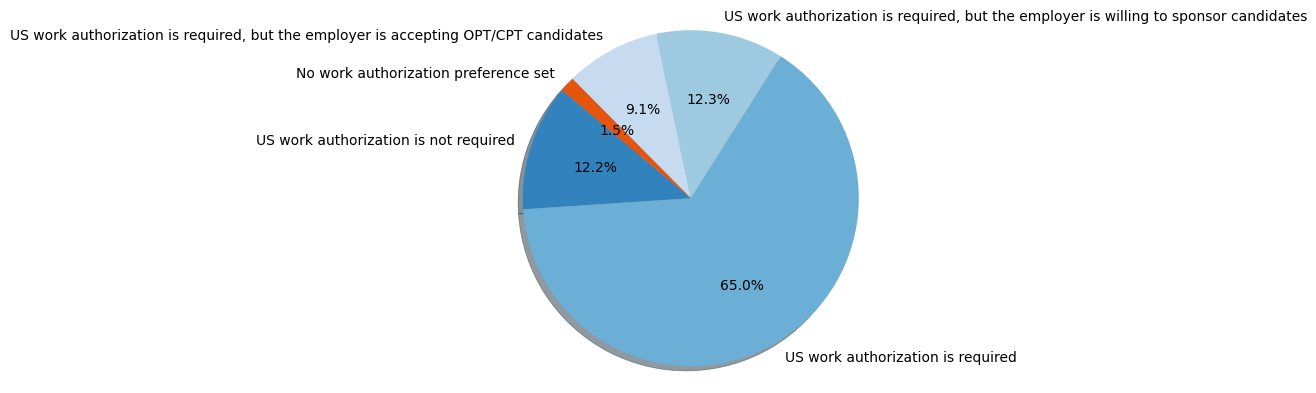

In [ ]:
visualize_counter_with_pie_chart(counter_output)

### **👽 Calling All Aliens: Opportunities in the Tech Realm**

Navigating the US job market as an international student can be challenging. However, the data suggests there's hope for students seeking both internships and full-time roles in the tech domain.

#### **📊 Breakdown of Opportunities:**

* **Internships for International Students:** There are numerous internships available that don't specifically demand US work authorization and, importantly, are paid. The get_internships_for_aliens function helps us find these.

* **Full-time Roles for International Students:** If you're beyond the internship phase and are scouting for full-time opportunities, the get_jobs_for_aliens function has got your back. The aim is to identify paid positions that are welcoming to international talent.

**🚀 Results:**
Internships Available: len(internships_for_aliens)
Full-time Roles Available: len(jobs_for_aliens)
With these insights, international students can confidently explore opportunities tailored for them in the tech world.

In [ ]:
def get_internships_for_aliens(_data):
    internships_for_aliens = []
    for i in _data:
        if i['student_screen']['work_authorization_requirements'] != 'US work authorization is required' and i['salary_type']['name'] != 'Unpaid' and i['job_type']['name'] == 'Internship':
            internships_for_aliens.append(i)

    return internships_for_aliens

def get_jobs_for_aliens(_data):
    jobs_for_aliens = []
    for i in _data:
        if i['student_screen']['work_authorization_requirements'] != 'US work authorization is required' and i['salary_type']['name'] != 'Unpaid' and i['job_type']['name'] == 'Job':
            jobs_for_aliens.append(i)

    return jobs_for_aliens

internships_for_aliens = get_internships_for_aliens(all_jobs_cs)
jobs_for_aliens = get_jobs_for_aliens(all_jobs_cs)

In [ ]:
alien_internships = len(internships_for_aliens)
alien_jobs = len(jobs_for_aliens)

print(f"🛸 Attention all space travelers! There are {alien_internships} paid internships waiting just for you!")
print(f"🌍 And for those who've decided Earth isn't that bad and want to settle down? We've got {alien_jobs} full-time roles calling your name!")

🛸 Attention all space travelers! There are 36 paid internships waiting just for you!
🌍 And for those who've decided Earth isn't that bad and want to settle down? We've got 170 full-time roles calling your name!


### **🕵️‍♂️ The Great Data Dump!**

Alright folks, grab your hard hats and excavating tools, 'cause we're about to dig deep! Ever wondered where all the data we've mined goes? Into the sacred vault known as... Excel. 😜

The spell below is a masterstroke of coding wizardry. It takes our gleaming data, shapes it to perfection, and then ensconces it in the hallowed halls of an Excel sheet. The best part? This treasure map will materialize right in your working directory, waiting to be explored. And for those who can't contain their excitement, a sneak peek will also be unveiled right here. Dive in and behold the data matrix in all its glory!


In [ ]:
def create_excel_from_jobs(_data:list, file_name:str):
    excel_data = []
    for i in _data:
        excel_data.append({
            'job_url' : f'https://ndsu.joinhandshake.com/stu/jobs/{i["id"]}',
            'title': i['title'],
            'employer': i['employer']['name'],
            'employer_website': i['employer']['website']
        })
    df = pd.DataFrame(excel_data)
    df.to_excel(file_name, index=False)
    with pd.option_context('display.max_colwidth', None):
        display(df)

### **🚗 Tesla & Internships: A Love Story 🚀**

Okay, brace yourself! We've done a deep dive into the intergalactic database of jobs (also known as Excel to us Earthlings), and guess what popped up? The one, the only - Tesla! And boy, are they all in on internships! Seems like Elon's not just aiming for Mars; he's also aiming for the best talent. And the best part? They're not just checking your Earth-passport (i.e., US work authorization)!

📈 What's The Trend, My Friend?

From our top-secret list above (pssst... okay not so top secret), here's the breakdown:

* **Tesla:** Going vroom with a whopping 15 internship offers!
* **Palantir Technologies:** Making an appearance with a solid 4 internships, looking for those software wizards!
* **Frontier Airlines:** They're soaring in with 3 internships, focused on analytics and scheduling. Perhaps helping them chart their next flight plan?

But, let's not forget the other stellar companies that are also opening their doors (and websites) for international talent. From data analytics to augmented reality, the job arena is as diverse as a box of assorted chocolates - there's something for everyone!

**So, gear up young padawans, it's time to seize these opportunities, and who knows, maybe one day you'll be test driving a Tesla on Mars! 🌌🌠**

In [ ]:
create_excel_from_jobs(internships_for_aliens, 'internships_for_aliens.xlsx')

,job_url,title,employer,employer_website
0,https://ndsu.joinhandshake.com/stu/jobs/8081147,Content Intern,CoSchedule,http://www.coschedule.com
1,https://ndsu.joinhandshake.com/stu/jobs/8077766,"Software Engineer, Internship - Palo Alto",Palantir Technologies,http://www.palantir.com
2,https://ndsu.joinhandshake.com/stu/jobs/8077761,"Software Engineer, Internship - DC",Palantir Technologies,http://www.palantir.com
3,https://ndsu.joinhandshake.com/stu/jobs/8076489,"Software Engineer, Internship - NY",Palantir Technologies,http://www.palantir.com
4,https://ndsu.joinhandshake.com/stu/jobs/8076277,"Forward Deployed Software Engineer, Internship - NY",Palantir Technologies,http://www.palantir.com
5,https://ndsu.joinhandshake.com/stu/jobs/8012832,Data Support Engineer,SCB Global,https://www.scb-global.com
6,https://ndsu.joinhandshake.com/stu/jobs/8010330,"Embedded C Software Internship, Vehicle Software (Winter/Spring 2024)",Tesla,http://www.tesla.com
7,https://ndsu.joinhandshake.com/stu/jobs/8010317,"Audio Systems Internship, Vehicle Software (Winter/Spring 2024)",Tesla,http://www.tesla.com
8,https://ndsu.joinhandshake.com/stu/jobs/8010294,"Full Stack Software Engineering, Applications Engineering (Winter/Spring 2024)",Tesla,http://www.tesla.com
9,https://ndsu.joinhandshake.com/stu/jobs/8010241,"Data Engineering Internship, Applications Engineering (Winter/Spring 2024)",Tesla,http://www.tesla.com


### **🌍 Landing the Perfect Job on Planet Earth! 🚀**

Welcome back, dear explorers from all over the world! If you've landed here on Earth on a student visa and are looking for some stellar opportunities without the pesky interference of work authorization, you're in the right place! No need to send out distress signals, we've got some job opportunities that'll make your extraterrestrial (or should we say, "extrastudential"?) heart soar.

#### **🛸 Quick Detour: Understanding the Jargon**
- **CPT**: Curricular Practical Training, allows students to take on employment as part of their curriculum.
  
- **OPT**: Optional Practical Training, post-graduation employment in the student's field of study.
  
- **Visa Sponsorship**: When the employer handles the necessary documentation for an employee's work visa.

#### **🌌 Spotlight on Opportunities:**

- **Defense Contract Management Agency**: While the name sounds straight out of a sci-fi movie, they're looking for a "Quality Assurance Specialist". Perhaps they'll ensure your transition from student to employee is smoother than a spacecraft landing?
  
- **Salk Institute for Biological Studies**: Gene Expression research! Dive deep into the building blocks of life. Who knows, you might unravel why humans love pizza so much! 🧬🍕
  
- **JnD Inc.**: Korean-speaking software enthusiasts, assemble! They've got a spot just for you in QA. 🖥️🇰🇷

- **NDSU IT Division**: Interstellar or inter-networking, they have something in store for those passionate about systems networking. 🌐

- **Microchip Technology Inc.**: Here's your chance to embark on a technology odyssey, one microchip at a time. 🎛️
  
... and so much more! From coding to clinical research, the universe (or at least, Earth) is your oyster.

In [ ]:
create_excel_from_jobs(jobs_for_aliens, 'jobs_for_aliens.xlsx')

,job_url,title,employer,employer_website
0,https://ndsu.joinhandshake.com/stu/jobs/8092047,Quality Assurance Specialist (Deployable),Defense Contract Management Agency,https://www.dcma.mil/Careers/
1,https://ndsu.joinhandshake.com/stu/jobs/8088129,"Research Assistant I, Gene Expression Laboratory, Dr. Evans",Salk Institute for Biological Studies,http://salk.edu
2,https://ndsu.joinhandshake.com/stu/jobs/8088042,[Korean Bilingual] Software QA Engineer,JnD Inc.,http://www.jndsolutions.net
3,https://ndsu.joinhandshake.com/stu/jobs/8087447,Systems Networking Student Intern,NDSU IT Division,https://www.ndsu.edu/it/employment/
4,https://ndsu.joinhandshake.com/stu/jobs/8086499,Engineer I-Product,Microchip Technology Inc.,http://www.microchip.com
...,...,...,...,...
165,https://ndsu.joinhandshake.com/stu/jobs/5598308,Software Development Engineer,Paramount Data Management Inc.,https://pdmautomotive.com
166,https://ndsu.joinhandshake.com/stu/jobs/4360881,Software Engineer II,Deseret Digital Media,http://www.deseretdigital.com/
167,https://ndsu.joinhandshake.com/stu/jobs/3603420,Life Sciences Research Assistant I,Palo Alto Veterans Institute for Research (PAVIR),http://pavir.org
168,https://ndsu.joinhandshake.com/stu/jobs/3545895,Mid Level iOS Developer,Deseret Digital Media,http://www.deseretdigital.com/


### **Ready for Liftoff! 🚀**

Without further ado, let's explore these celestial opportunities!